<a href="https://colab.research.google.com/github/Professori1086/Machine-learning/blob/main/Maize_leaf_rust_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## END TO END BINARY CLASS CLASSIFICATION TO DETECT LEAF RUST IN MAIZE PLANTS

Maize is one of the major food crops in our country Kenya. It is consumed by a majority of the population either in form of ugali, porridge or githeri. however the production cost has been going up and the yields going down due to various factors, one of them being attack by diseases. In this project, we are going to produce a model that can detect maize rust by loading an image into it.

To do this, we'll be using data from the Kaggle plantvillage updated dataset. It consists of a collection of 4,000+ labelled images of leaf rust and healthy leaf pictures.

This kind of problem is called binary-class image classification. It's binary-class because we're trying to classify between an  infected leaf versus a healthy one. If we were trying to classify different stages of the leaf rust, then it would have been a multiclass classification.

Since the most important step in a deep learng problem is getting the data ready (turning it into numbers), that's what we're going to start with.

We're going to go through the following TensorFlow/Deep Learning workflow:

* Get data ready (download from Kaggle, store, import).
* Prepare the data (preprocessing, the 3 sets, X & y).
* Choose and fit/train a model (TensorFlow Hub, tf.keras.applications, TensorBoard, EarlyStopping).
* Evaluating a model (making predictions, comparing them with the ground truth labels).
* Improve the model through experimentation (start with 100 images, make sure it works, increase the number of images).
* Save, sharing and reloading your model (once you're happy with the results).

For preprocessing our data, we're going to use TensorFlow 2.x. The whole premise here is to get our data into Tensors (arrays of numbers which can be run on GPUs) and then allow a machine learning model to find patterns between them.

For our machine learning model, we're going to be using a pretrained deep learning model from TensorFlow Hub.

The process of using a pretrained model and adapting it to your own problem is called transfer learning. We do this because rather than train our own model from scratch (could be timely and expensive), we leverage the patterns of another model which has been trained to classify images.


### PROBLEM STATEMENT

Identify if a maize plant is infected or not given the image of a maize leaf. Help maize farmers to see how many plants are infected when an image is fed into it.

### Steps that we are going to take

* Importing the necessary tools
* Becoming one with the data
* Preparing data for modelling
* Creating a CNN model (starting with a baseline)
* Fitting a model (getting it to find patterns in our data)
* Evaluating a model
* Improving a model
* Making a prediction with a trained model

In [ ]:
# Importing the necessary tools
import tensorflow as tf
import tensorflow_hub as hub

print("TF version", tf.__version__)
print("Hub version", hub.__version__)

TF version 2.12.0
Hub version 0.13.0


In [ ]:
print("GPU", "available Yess!!!"if tf.config.list_physical_devices("GPU") else "not available")

GPU available Yess!!!


In this project we need a GPU. A GPU is a computer chip which is faster at doing numerical computing. Since machine learning is all about finding patterns in numbers, that's what we're after.

we are also going to use the convolution neural network and computer vision to help in producing the model

## Getting data ready

In [ ]:
# Mounting our google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing other modules
import matplotlib.pyplot as plt
import numpy as np


### Importing images

In [ ]:
import os

In [ ]:
image_folder_path = '/content/drive/MyDrive/Common Rust'
file_names = os.listdir(image_folder_path)
print(file_names)

['Train', 'Valid', 'Test']


In [ ]:
train_folder_path = '/content/drive/MyDrive/Common Rust/Train'
images_train = os.listdir(train_folder_path)
print(images_train)

['Common Rust', 'Healthy']


In [ ]:
common_rust_train = '/content/drive/MyDrive/Common Rust/Train/Common Rust'
train_rust = os.listdir(common_rust_train)
print(train_rust)

['RS_Rust 1594.JPG', 'RS_Rust 1724.JPG', 'RS_Rust 1974.JPG', 'RS_Rust 1757_flipLR.JPG', 'RS_Rust 1801.JPG', 'RS_Rust 2124.JPG', 'RS_Rust 2076_flipLR.JPG', 'RS_Rust 2003.JPG', 'RS_Rust 1781.JPG', 'RS_Rust 1909.JPG', 'RS_Rust 1732.JPG', 'RS_Rust 1719.JPG', 'RS_Rust 1883_flipLR.JPG', 'RS_Rust 1672_flipLR.JPG', 'RS_Rust 1807.JPG', 'RS_Rust 1600_flipLR.JPG', 'RS_Rust 2125.JPG', 'RS_Rust 2155.JPG', 'RS_Rust 2099.JPG', 'RS_Rust 2086_flipLR.JPG', 'RS_Rust 1642.JPG', 'RS_Rust 1603.JPG', 'RS_Rust 2180.JPG', 'RS_Rust 1736.JPG', 'RS_Rust 2126_flipLR.JPG', 'RS_Rust 2052_flipLR.JPG', 'RS_Rust 1695.JPG', 'RS_Rust 2237.JPG', 'RS_Rust 2066_flipLR.JPG', 'RS_Rust 1822.JPG', 'RS_Rust 2135.JPG', 'RS_Rust 1604.JPG', 'RS_Rust 2154_flipLR.JPG', 'RS_Rust 1566_flipLR.JPG', 'RS_Rust 1964.JPG', 'RS_Rust 1692.JPG', 'RS_Rust 1597.JPG', 'RS_Rust 2068_flipLR.JPG', 'RS_Rust 1699.JPG', 'RS_Rust 2162_flipLR.JPG', 'RS_Rust 1748.JPG', 'RS_Rust 2036.JPG', 'RS_Rust 2067.JPG', 'RS_Rust 2223.JPG', 'RS_Rust 1693_flipLR.JPG', '

In [ ]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/Common Rust/Train')
classnames = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(classnames)


['Common Rust' 'Healthy']


Image shape: (256, 256, 3)


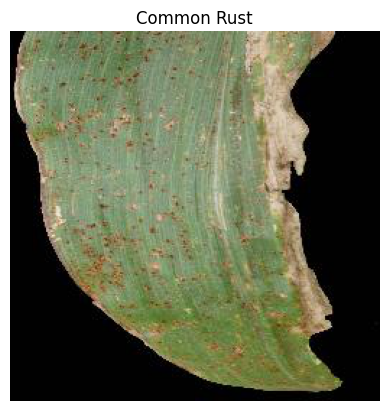

In [ ]:
# visualizing our image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class # target directory folder
  random_image = random.sample(os.listdir(target_folder),1) # get random image path
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

img = view_random_image(target_dir = '/content/drive/MyDrive/Common Rust/Train/',
                         target_class = 'Common Rust')

In [ ]:
# Get all values between 0 and 1
img/255

array([[[0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.00392157],
        [0.        , 0.00784314, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.00392157],
        [0.        , 0.00784314, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.        , 0.00784314, 0.00392157],
        [0.        , 0.00784314, 0.00392157],
        [0.        , 0.00784314, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0

## Building an end to end Convolutional Neural Network CNN

In [ ]:
# Loading our images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set seed
tf.random.set_seed(42)

# Preprocess data (getting all pixels between 0 and 1)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup train and test directories
train_dir = '/content/drive/MyDrive/Common Rust/Train/'
valid_dir = '/content/drive/MyDrive/Common Rust/Valid/'


# Import data from directories and turning it into batches
train_data = train_datagen.flow_from_directory(sliced_train,
                                               batch_size = 32, # number of images to process at a time
                                               target_size = (224,224), # convert all images to 224 by 224
                                               class_mode = "binary", # type of problem we are working with
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(sliced_valid,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)



Found 3798 images belonging to 2 classes.
Found 847 images belonging to 2 classes.


In [ ]:
# Building a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                            kernel_size = 3,
                            activation = "relu",
                            input_shape = (224,224,3)), # first layer specifies input shape (height, width, colour channels)
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compiling our model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

model_1.summary()

Epoch 1/5
119/119 [==============================] - 759s 6s/step - loss: 0.0818 - accuracy: 0.9626 - val_loss: 0.0157 - val_accuracy: 0.9953
Epoch 2/5
119/119 [==============================] - 17s 143ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0076 - val_accuracy: 0.9988
Epoch 3/5
119/119 [==============================] - 17s 143ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0085 - val_accuracy: 0.9976
Epoch 4/5
119/119 [==============================] - 17s 144ms/step - loss: 0.0060 - accuracy: 0.9989 - val_loss: 0.0095 - val_accuracy: 0.9988
Epoch 5/5
119/119 [==============================] - 17s 144ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.0082 - val_accuracy: 0.9988
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 10)      280       
                                                              